In [2]:
%matplotlib inline
# NB: per eseguire questo notebook come file Python, commentare l'istruzione "%matplotlib inline" qui sopra e scegliere il menù "File -> Download as -> Python (.py)"
import numpy as np
import matplotlib.pyplot as plt
from testBartlett_wn import *

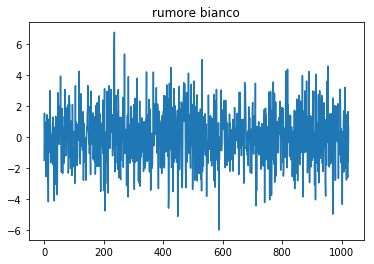

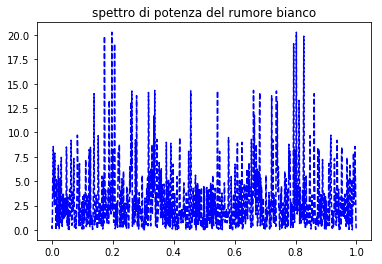

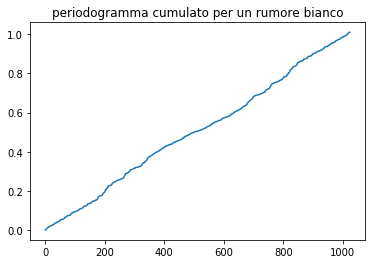

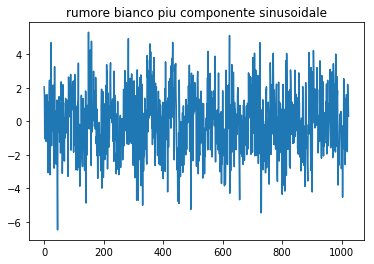

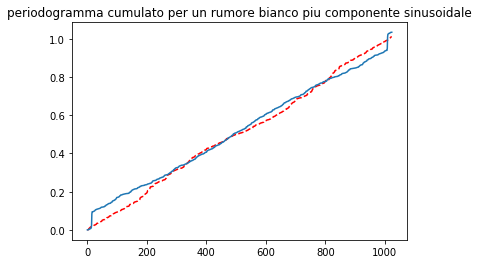

In [3]:
#
# test di Bartlett (o del periodogramma cumulato): serve per verificare se una sequenza è rumore bianco:
#
N = 1024
var_s = 3.0
s = np.sqrt(var_s)*np.random.randn(N)
plt.figure(1); plt.plot(s); plt.title('rumore bianco'); plt.show()
Pss, f = psd_Welch(s);
plt.figure(2); plt.plot(f, Pss, 'b--'); plt.title('spettro di potenza del rumore bianco');
CPss_wn,f = testBartlett_wn(s)
plt.figure(4); plt.plot(CPss_wn); plt.title('periodogramma cumulato per un rumore bianco'); plt.show()
s = np.sqrt(var_s)*np.random.randn(N) + np.sin(2.*np.pi/(N/15)*np.arange(N))
plt.figure(5); plt.plot(s); plt.title('rumore bianco piu'' componente sinusoidale'); plt.show() 
CPss,f = testBartlett_wn(s);
plt.figure(6); plt.plot(CPss_wn, 'r--'); plt.plot(CPss); plt.title('periodogramma cumulato per un rumore bianco piu'' componente sinusoidale'); 
plt.show()

In [6]:
# an index to quantify the deviation from a white noise:
NormalizedCumulativePeriodogram = np.concatenate(([0], CPss_wn / CPss_wn[-1]))
NCP_index_wn = np.linalg.norm(NormalizedCumulativePeriodogram - np.linspace(0, 1, len(NormalizedCumulativePeriodogram))) / len(NormalizedCumulativePeriodogram)
print("NCP of white noise = ",NCP_index_wn)
NormalizedCumulativePeriodogram = np.concatenate(([0], CPss / CPss[-1]))
NCP_index = np.linalg.norm(NormalizedCumulativePeriodogram - np.linspace(0, 1, len(NormalizedCumulativePeriodogram))) / len(NormalizedCumulativePeriodogram)
print("NCP of white noise plus sinusoid = ",NCP_index)

NCP white noise =  0.00047012382064143135
NCP white noise plus sinusoid =  0.001170068479430895


In [7]:
# independency from variance:
NormalizedCumulativePeriodogram = np.concatenate(([0], CPss_wn / CPss_wn[-1]))
NCP_index_wn = np.linalg.norm(NormalizedCumulativePeriodogram - np.linspace(0, 1, len(NormalizedCumulativePeriodogram))) / len(NormalizedCumulativePeriodogram)
print("NCP of white noise = ",NCP_index_wn)
var_s = var_s * 10
s = np.sqrt(var_s)*np.random.randn(N)
CPss_wn,f = testBartlett_wn(s)
NormalizedCumulativePeriodogram = np.concatenate(([0], CPss_wn / CPss_wn[-1]))
NCP_index_wn = np.linalg.norm(NormalizedCumulativePeriodogram - np.linspace(0, 1, len(NormalizedCumulativePeriodogram))) / len(NormalizedCumulativePeriodogram)
print("NCP of white noise with a bigger variance = ",NCP_index_wn)

NCP of white noise =  0.00047012382064143135
NCP of white noise with a bigger variance =  0.00034995137092625893
